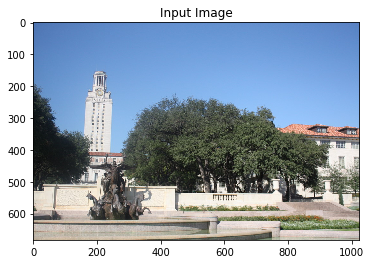

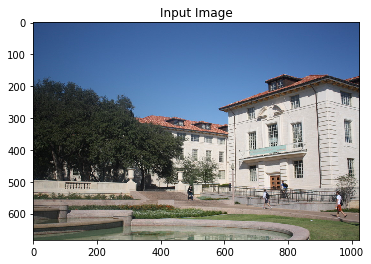

In [9]:
import cv2 
import numpy as np 
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from PIL import Image
import random
import time
img = cv2.imread("uttower_left.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Input Image")
plt.show()
img2 = cv2.imread("uttower_right.jpg")
image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.title("Input Image")
plt.show()

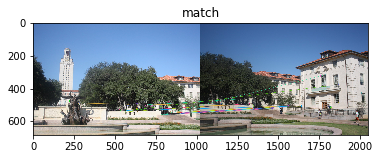

In [15]:
object1 = cv2.ORB_create(nfeatures=100)
point1, descript1 =object1.detectAndCompute(image, None)
point2, descript2 = object1.detectAndCompute(image2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descript1, descript2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 20 matches
match_img = cv2.drawMatches(image, point1, image2, point2, matches[:20], None)
plt.imshow(match_img, cmap='gray')
plt.title("match 20")
plt.show()

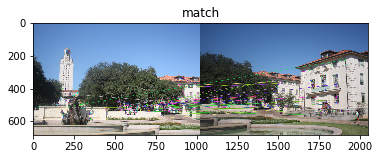

In [16]:
orb = cv2.ORB_create(nfeatures=1000)
pt1, d1 = orb.detectAndCompute(image, None)
pt2, d2 = orb.detectAndCompute(image2, None)


similarity_func = cv2.BFMatcher(cv2.TM_CCOEFF_NORMED, crossCheck=True)
sim_matrix = similarity_func.match(d1, d2)
sim_matrix = sorted(sim_matrix, key=lambda x: x.distance)
# similarity_matrix = similarity_matrix[::-1]
random_samples = random.sample(sim_matrix, 30)

# Calculating for Random 30 features
sim_img= cv2.drawMatches(image, pt1, image2, pt2, random_samples[:30], None)

plt.imshow(sim_img, cmap='gray')
plt.title("match 30")
plt.show()